<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 26 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   country                                                                            15110 non-null  object 
 1   year                                                                               15110 non-null  int64  
 2   sex                                                                                15110 non-null  object 
 3   age                                                                                15110 non-null  object 
 4   suicides_no                                                                        15110 non-null  int64  
 5   population                                                                         15110 non-null  int

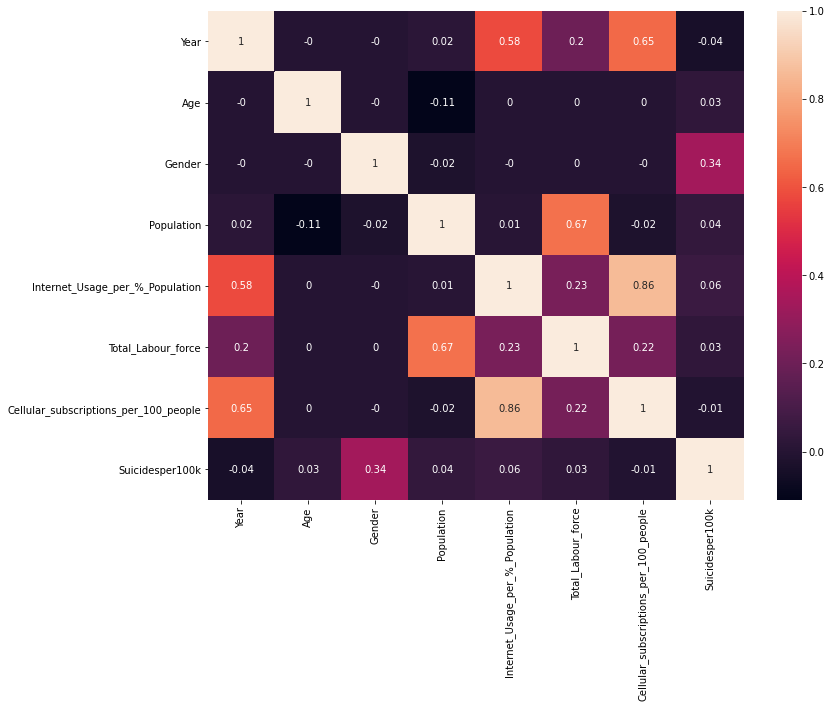

[['Argentina' 1985 5 ... 0 0 0]
 ['Argentina' 1985 4 ... 0 0 0]
 ['Argentina' 1985 2 ... 0 0 0]
 ...
 ['Uzbekistan' 2014 3 ... 0 0 0]
 ['Uzbekistan' 2014 3 ... 0 0 0]
 ['Uzbekistan' 2014 4 ... 0 0 0]]
[[3]
 [3]
 [3]
 ...
 [2]
 [1]
 [1]]
['Argentina' 1985 5 1 363000 0 0 0]
5.0
[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.985e+03
 5.000e+00 1.000e+00 3.630e+05 0.000e+00 0.000e+00 0.000e+00]
The length of X_train is  12001  and the length of y_train is  12001
The length of X_test is  3001  and the length of y_test is  3001
X_test  [[0.0000000e+00 0.0000

In [53]:
%run X_and_y_selection.ipynb 

In [56]:
def Classifier_function(typeofmodelandprams, X_train, y_train):  # function takes the type of model, the hyperparameters of the
    # model, the x_train and y_train to get our results.
  model = typeofmodelandprams  # Bulding an object of the class
  model.fit(X_train, y_train)  # Building the k-nearest neighbors classification model.

  y_test_p = model.predict(X_test)  # Predicted results.
  print("  results\npred-Actual")  # printing predicted and real values.
  print(np.concatenate((y_test_p.reshape(len(y_test_p),1),y_test.reshape(len(y_test),1)),1))  # Predicted results and real results in a np array.
  accuracy = round(model.score(X_test,y_test),2) *100  # getting the model accuracy.
  print("Model accuracy: ", accuracy, "%")  # printing the model accurcy.


  


  return accuracy

In [57]:
print("Testing K_NN Model")  # printing the name of the model.
Classifier_function(KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2), X_train, y_train )  # enter model, 
# X and y train values it can be used in the function. 

Testing K_NN Model


C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


  results
pred-Actual
[[3 3]
 [3 3]
 [3 3]
 ...
 [1 1]
 [3 3]
 [2 3]]
Model accuracy:  76.0 %


76.0